<a href="https://colab.research.google.com/github/Benendead/LSTMjazz/blob/master/LSTMjazz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup for Music21

In [0]:
# Check which version of Linux we have, and our distribution.
!uname
!uname -r
!lsb_release -a

# Updates the Linux package installer thing we need to use.
!apt upgrade

# Allows us to install directly from source, as we're about to do for Lilypond.
!sed -i '/deb-src/s/^# //' /etc/apt/sources.list && apt update

# Build the dependencies for Lilypond.
!apt build-dep lilypond

# Lilypond also wants us to run this.
!apt install autoconf fonts-texgyre texlive-lang-cyrillic

# Now install Lilypond.
!apt install lilypond

Linux
4.14.65+
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.1 LTS
Release:	18.04
Codename:	bionic
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Calculating upgrade... Done
The following packages have been kept back:
  libcudnn7 libnccl2
The following packages will be upgraded:
  dpkg libldap-2.4-2 libldap-common libssl1.1 openssl ubuntu-keyring
6 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
Need to get 2,996 kB of archives.
After this operation, 4,096 B of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 dpkg amd64 1.19.0.5ubuntu2.1 [1,140 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 ubuntu-keyring all 2018.09.18.1~18.04.0 [22.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libssl1.1 amd64 1.1.0g-2ubuntu4.3 [1,130 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 openssl 

In [0]:
# Also install Musescore.
!apt install musescore

In [0]:
!whereis musescore
!whereis lilypond

# Import Libraries and Data

In [1]:
!pip install music21

# m21.environment.set('pdfPath', '/usr/bin/musescore')
# m21.environment.set('graphicsPath', '/usr/bin/musescore')
# m21.environment.set('musescoreDirectPNGPath', '/usr/bin/musescore')
# m21.environment.UserSettings()['lilypondPath'] = '/usr/bin/lilypond'

In [0]:
import music21 as m21
import glob

In [3]:
!git clone https://github.com/Benendead/LSTMjazz/

Cloning into 'LSTMjazz'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 151 (delta 4), reused 0 (delta 0), pack-reused 139
Receiving objects: 100% (151/151), 469.56 KiB | 5.94 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [4]:
# Check out the directory.
!ls LSTMjazz

Datasets  Keyboard.py  LSTMjazz.ipynb  README.md


In [5]:
# Find the songs.
!ls LSTMjazz/Datasets/"Omnibook Mxml"

 An_Oscar_For_Treadwell.xml   Kim_2.xml
 Another_Hairdo.xml	      Ko_Ko.xml
 Anthropology.xml	      Laird_Baird.xml
 Au_Private_1.xml	      Marmaduke.xml
 Au_Private_2.xml	      Mohawk_1.xml
 Back_Home_Blues.xml	      Mohawk_2.xml
 Barbados.xml		      Moose_The_Mooche.xml
"Billies's_Bounce.xml"	      My_Little_Suede_Shoes.xml
 Bird_Gets_The_Worm.xml      "Now's_The_Time_1.xml"
 Bloomdido.xml		     "Now's_The_Time_2.xml"
 Blue_Bird.xml		      Ornithology.xml
 Blues_For_Alice.xml	      Passport.xml
 Buzzy.xml		      Perhaps.xml
 Card_Board.xml		      Red_Cross.xml
 Celerity.xml		      Relaxing_With_Lee.xml
 Chasing_The_Bird.xml	      Scrapple_From_The_Apple.xml
 Cheryl.xml		      Segment.xml
 Chi_Chi.xml		      Shawnuff.xml
 Confirmation.xml	      Si_Si.xml
 Cosmic_Rays.xml	      Steeplechase.xml
 Dewey_Square.xml	      The_Bird.xml
 Diverse.xml		      Thriving_From_A_Riff.xml
 Donna_Lee.xml		      Visa.xml
 KC_Blues.xml		      Warming_Up_A_Riff.xml
 Kim_1.xml		      Yardbird_Suite.xml


In [6]:
# Import the songs into a list.

streams = []
names = []
i = 1
for xml_file in glob.glob("LSTMjazz/Datasets/*/*.xml"): # Selects all .xml files in the Datasets folder.
    if (i == 1 or i % 5 == 0):
      print('Processing song ', i, ":", xml_file)
    newSong = m21.converter.parse(xml_file)
    streams.append(newSong)
    
    songName = xml_file[32:-4]                          # Formats xml_file to get the name of the song.
    names.append(songName)
    
    i = i + 1

Processing song  1 : LSTMjazz/Datasets/Omnibook Mxml/Thriving_From_A_Riff.xml
Processing song  5 : LSTMjazz/Datasets/Omnibook Mxml/Bird_Gets_The_Worm.xml
Processing song  10 : LSTMjazz/Datasets/Omnibook Mxml/Warming_Up_A_Riff.xml
Processing song  15 : LSTMjazz/Datasets/Omnibook Mxml/Buzzy.xml
Processing song  20 : LSTMjazz/Datasets/Omnibook Mxml/Kim_1.xml
Processing song  25 : LSTMjazz/Datasets/Omnibook Mxml/Moose_The_Mooche.xml
Processing song  30 : LSTMjazz/Datasets/Omnibook Mxml/Dewey_Square.xml
Processing song  35 : LSTMjazz/Datasets/Omnibook Mxml/Segment.xml
Processing song  40 : LSTMjazz/Datasets/Omnibook Mxml/Blues_For_Alice.xml
Processing song  45 : LSTMjazz/Datasets/Omnibook Mxml/Celerity.xml
Processing song  50 : LSTMjazz/Datasets/Omnibook Mxml/Si_Si.xml


# Format Data: Chords

In [0]:
def formatStream(stream):
  m21.harmony.realizeChordSymbolDurations(stream)           # Fills out chords' proper durations.
  key = stream.analyze("key")                               # Finds how far off we are from C.
  i = m21.interval.Interval(key.tonic, m21.pitch.Pitch("C"))
  transposedStream = stream.transpose(i)                    # Transposes us that far to C.
  return transposedStream

In [8]:
# Realize chord durations and also transpose all songs to Cmaj or Amin (no flats/sharps).
betterStreams = []

i = 1
for s in streams:
  if (i == 1 or i % 5 == 0):
    print('Processing song', i)
  newStream = formatStream(s)
  betterStreams.append(newStream)
  i = i + 1

Processing song 1
Processing song 5
Processing song 10
Processing song 15
Processing song 20
Processing song 25
Processing song 30
Processing song 35
Processing song 40
Processing song 45
Processing song 50


In [0]:
def getDuration(stream, display = False):
  """
  Takes a Music21 stream and returns the total length of the chords in the stream.
  """
  part = stream.parts[0]
  sumDuration = 0
  
  for m in part:                                            # For measures in the song...
    if isinstance(m, m21.stream.Measure):
      for c in m.notes:
        if isinstance(c, m21.harmony.ChordSymbol):          # For the chords...
          sumDuration = sumDuration + c.duration.quarterLength
          
  if (display):
    print("Total length of song is", sumDuration, "beats.")
  
  return sumDuration

In [10]:
durations = []

total = 0
for s in betterStreams:
  duration = getDuration(s)
  durations.append(duration)
  total = total + duration
  
print("We have", total, "total beats of data.")

We have 14084.0 total beats of data.


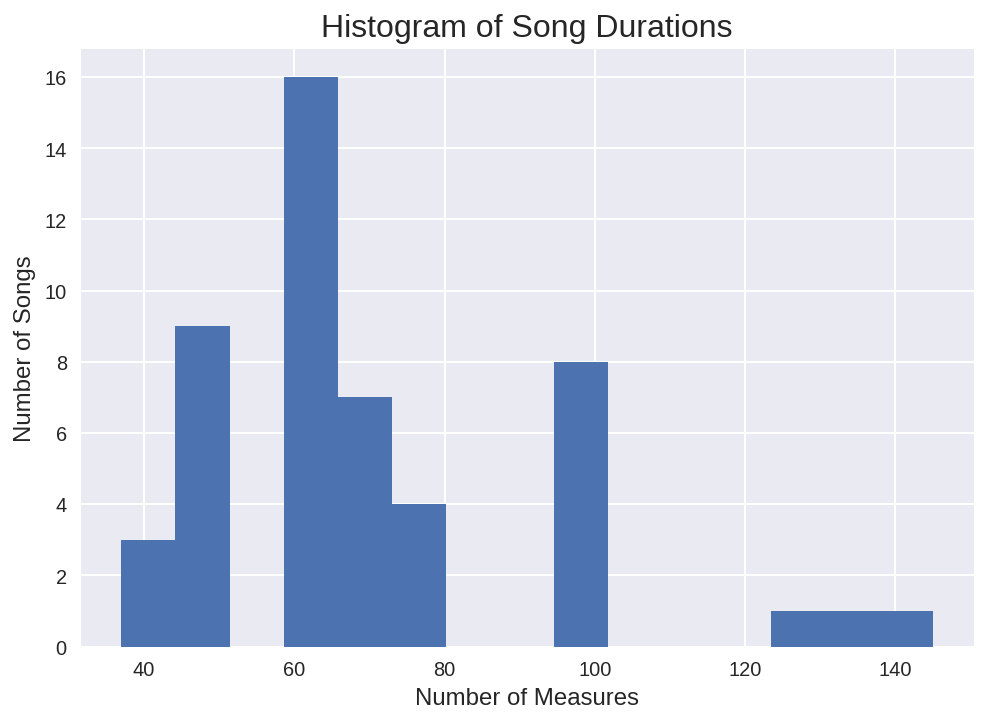

In [11]:
# Some insight into the durations of the songs we have.

import matplotlib.pyplot as plt
import numpy as np

n_bins = 15
x = np.array(durations) / 4

fig, ax = plt.subplots()

plt.title("Histogram of Song Durations", fontsize = 16)
plt.xlabel("Number of Measures", fontsize = 12)
plt.ylabel("Number of Songs", fontsize = 12)

hist = ax.hist(x, bins = n_bins) # We can set the number of bins for the histogram with the "bins" kwarg

In [0]:
def printChords(stream):
  part = stream.parts[0]
  
  # Collect the chords in the song.
  for m in part:                                     # For measures in the song...
    if isinstance(m, m21.stream.Measure):
      for c in m.notes:
        if isinstance(c, m21.harmony.ChordSymbol):   # If this object is a chord...
          notesInChord = ""
          for p in c.pitches:
            p.octave = 4
            num = (p.midi - 60) % 12                 # num will range from 0 to 11.
            notesInChord = notesInChord + str(num) + " "
          
          measure = int((m.offset / 4.) + 1)
          print("Measure", measure, ":", str(c.figure), "for", str(c.duration.quarterLength), "beats. Notes:", notesInChord)

In [13]:
printChords(betterStreams[9])

# Note measure 115 here:
# The chord G#7 has notes G#, B#, D#, and F#.
# B#4 would have given us note 73, which minus 60 is 13, hence requiring the modulo 12 seen above.

Measure 1 : G7 for 4.0 beats. Notes: 7 11 2 5 
Measure 2 : C for 4.0 beats. Notes: 0 4 7 
Measure 3 : C for 4.0 beats. Notes: 0 4 7 
Measure 4 : Gm for 4.0 beats. Notes: 7 10 2 
Measure 5 : C7 for 4.0 beats. Notes: 0 4 7 10 
Measure 6 : F for 4.0 beats. Notes: 5 9 0 
Measure 7 : F for 4.0 beats. Notes: 5 9 0 
Measure 8 : Fm for 4.0 beats. Notes: 5 8 0 
Measure 9 : B-7 for 4.0 beats. Notes: 10 2 5 8 
Measure 10 : C for 4.0 beats. Notes: 0 4 7 
Measure 11 : C for 4.0 beats. Notes: 0 4 7 
Measure 12 : D7 for 4.0 beats. Notes: 2 6 9 0 
Measure 13 : D7 for 4.0 beats. Notes: 2 6 9 0 
Measure 14 : Dm for 4.0 beats. Notes: 2 5 9 
Measure 15 : G7 for 4.0 beats. Notes: 7 11 2 5 
Measure 16 : C for 4.0 beats. Notes: 0 4 7 
Measure 17 : C for 4.0 beats. Notes: 0 4 7 
Measure 18 : C for 4.0 beats. Notes: 0 4 7 
Measure 19 : C for 4.0 beats. Notes: 0 4 7 
Measure 20 : Gm for 4.0 beats. Notes: 7 10 2 
Measure 21 : C7 for 4.0 beats. Notes: 0 4 7 10 
Measure 22 : F for 4.0 beats. Notes: 5 9 0 
Measure 

In [0]:
def processChords(stream, duration):
  """
  Create the 2D numpy array which will represent the chords of this song.
  NOTE: Vertical of the 2D array represents time.
        Horizontal represents the 12 possible chord notes for each tick.
  """
  subdivide = 12   # Here we set the number of subdivisions our data and thus model will consider per beat. Big decision.
  ticks = int(duration * subdivide)  # The total number of "ticks" in this entire song
  
  # Create the numpy array to store the chord data.
  arr = np.zeros((ticks, 12))
  
  part = stream.parts[0]
  
  # Collect the chords in the song.
  for m in part:                                     # For measures in the song...
    if isinstance(m, m21.stream.Measure):
      currOffset = int(m.offset * subdivide)         # This offset is in ticks.
      
      for c in m.notes:
        if isinstance(c, m21.harmony.ChordSymbol):   # If this object is a chord...
          ticksInChord = int(c.duration.quarterLength * subdivide)
          endOfChord = currOffset + ticksInChord
          
          notesInChord = []
          for p in c.pitches:
            p.octave = 4
            num = int(p.midi - 60) % 12              # num will range from 0 to 11.
            notesInChord.append(num)
         
          for r in range(currOffset, endOfChord):    # For each row, representing all ticks in this chord...
            for n in notesInChord:                   # Set all the notes in this chord to 1 for these ticks.
              arr[r][n] = 1
          
          currOffset = currOffset + ticksInChord     # Account for two chords in a measure by adding the first chord to the offset.
          
  return arr

In [0]:
def checkRows(arr):
  for row in arr:
    found = False
    for c in row:
      if (c == 1):
        found = True
    if (not found):
      print("Nothing in this row.")

In [16]:
output = processChords(betterStreams[9], durations[9])
checkRows(output) # Shows us that each tick has a chord input.
len(output)

6960

In [17]:
output

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [18]:
chords = []

i = 1
for s in betterStreams:
  if (i == 1 or i % 5 == 0):
    print("Processing song", i)
  d = getDuration(s)
  arr = processChords(s, d)
  chords.append(arr)
  i = i + 1

Processing song 1
Processing song 5
Processing song 10
Processing song 15
Processing song 20
Processing song 25
Processing song 30
Processing song 35
Processing song 40
Processing song 45
Processing song 50


# Format Data: Notes

## An Issue with Range

If you recall, we've transposed all of the songs to C major. With this comes the issue that some songs are now unplayable in the range of any one type of saxophone. Let's find out just how bad the problem is.

In [0]:
def findSongMinMax(stream, verbose = False):
  # Choose values obviously lower and higher than the MIDI notes in the song.
  minimumNoteValue = 500
  minPitch = ""
  maximumNoteValue = 0
  maxPitch = ""
  
  part = stream.parts[0]
    
  # Compare the notes in the song.
  for m in part:                                   # For measures in the song...
    if isinstance(m, m21.stream.Measure):
      for n in m.notes: 
        if isinstance(n, m21.note.Note):           # If this object is a note...
          pitch = n.pitch
          num = int(pitch.midi)                    # Get the note's MIDI number
            
          if (num < minimumNoteValue):
            minimumNoteValue = num
            minPitch = str(pitch.nameWithOctave)
              
          if (num > maximumNoteValue):
            maximumNoteValue = num
            maxPitch = str(pitch.nameWithOctave)
            
  if (verbose):
    print("Min:", str(minimumNoteValue) + ",", minPitch + ".\tMax:", str(maximumNoteValue) + ",", maxPitch)
  
  return int(minimumNoteValue), int(maximumNoteValue)

In [0]:
def findRange(streams):
  minimumNoteValue = 500
  minPitch = ""
  maximumNoteValue = 0
  maxPitch = ""
  
  for s in streams:
    mn, mx = findSongMinMax(s)
    if (mn < minimumNoteValue):
      minimumNoteValue = mn
    if (mx > maximumNoteValue):
      maximumNoteValue = mx
  
  minMIDI = m21.pitch.Pitch()
  minMIDI.midi = minimumNoteValue
  minName = minMIDI.nameWithOctave
  maxMIDI = m21.pitch.Pitch()
  maxMIDI.midi = maximumNoteValue
  maxName = maxMIDI.nameWithOctave
  print("Min MIDI note:", str(minimumNoteValue) + ",", minName)
  print("Max MIDI note:", str(maximumNoteValue) + ",", maxName)

In [0]:
def getAveragesError(streams):
  length = len(streams)
  averages = np.zeros(length)
  error = np.zeros(length)
  
  i = 0
  for s in streams:
    minimum, maximum = findSongMinMax(s)
    
    average = float(maximum + minimum) / 2.
    averages[i] = average
    
    e = average - minimum
    error[i] = e
    
    i += 1
  return averages, error

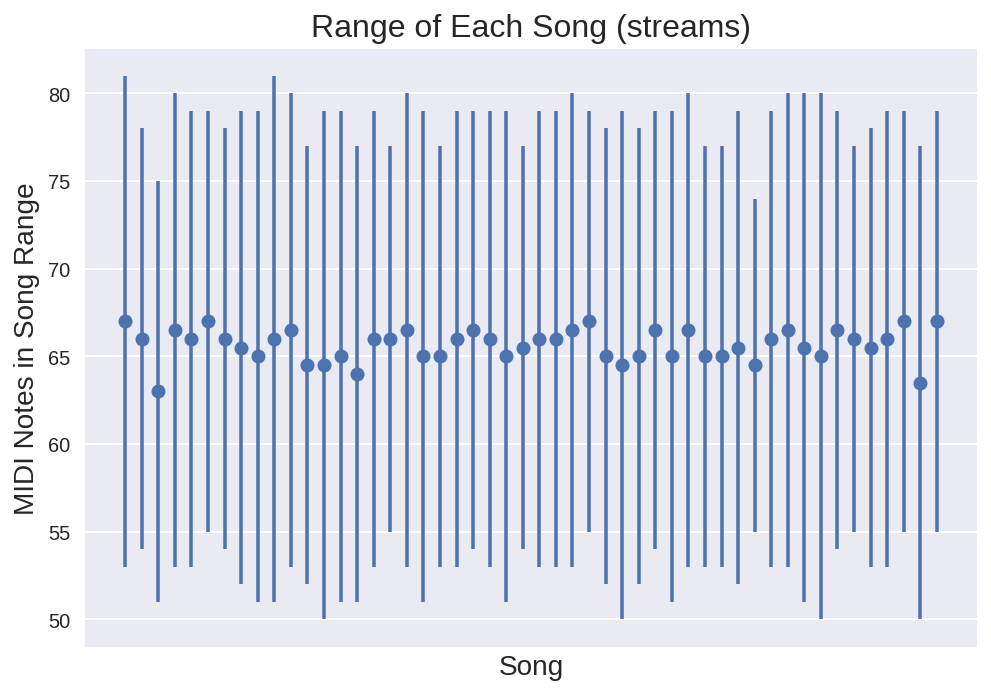

In [22]:
# Plot the untransposed dataset version
y, e = getAveragesError(streams)
plt.errorbar(range(len(y)), y, yerr = e, fmt = "o")

plt.title("Range of Each Song (streams)", fontsize = 16)
plt.xlabel("Song", fontsize = 14)
plt.xticks([])
plt.ylabel("MIDI Notes in Song Range", fontsize = 14)

plt.show()

In [23]:
print("Mean:", np.mean(y), "Std Dev:", np.std(y))
findRange(streams)

Mean: 65.65 Std Dev: 0.9124143795447329
Min MIDI note: 50, D3
Max MIDI note: 81, A5


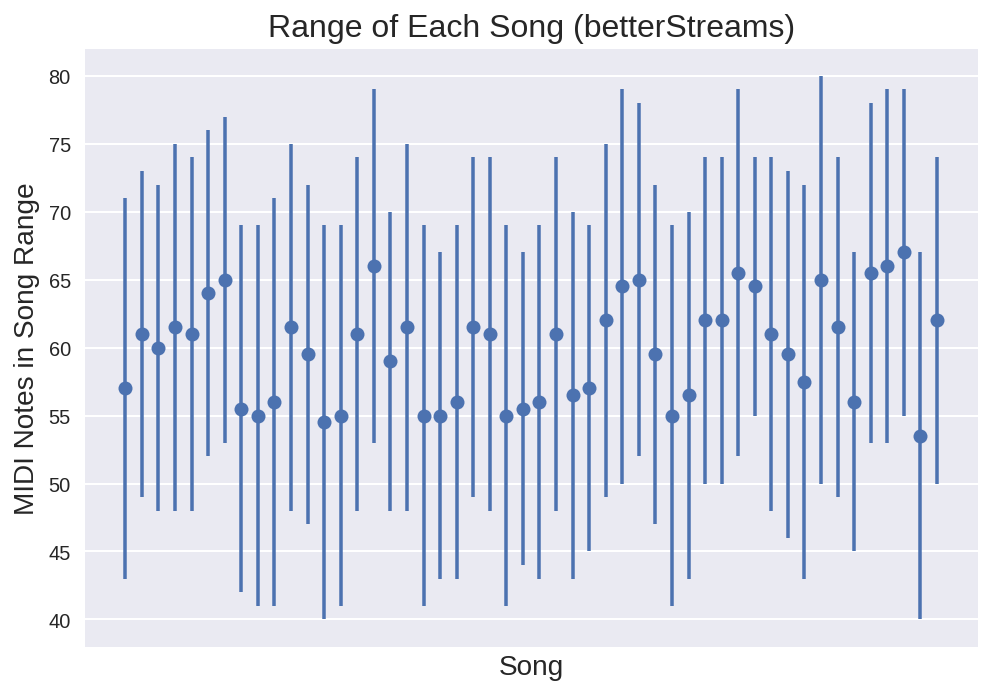

In [24]:
# Plot the transposed dataset version
y, e = getAveragesError(betterStreams)
plt.errorbar(range(len(y)), y, yerr = e, fmt = "o")

plt.title("Range of Each Song (betterStreams)", fontsize = 16)
plt.xlabel("Song", fontsize = 14)
plt.xticks([])
plt.ylabel("MIDI Notes in Song Range", fontsize = 14)

plt.show()

In [25]:
print("Mean:", np.mean(y), "Std Dev:", np.std(y))
findRange(betterStreams)

Mean: 59.89 Std Dev: 3.803011964219939
Min MIDI note: 40, E2
Max MIDI note: 80, G#5


![MIDI Chart](https://newt.phys.unsw.edu.au/jw/graphics/notes.GIF)  
Image from https://newt.phys.unsw.edu.au/jw/notes.html

Checking out a few sources on the range of both alto and tenor saxophone, we see that E2 is about a major third lower than a tenor can play. That said, G#5 is at the edge of an alto's range, which is good.

http://www.bristolnotes.com/tutorial/rangesax.htm  
http://www.amyschumacher.com/wp-content/uploads/2007/11/rangetrans.pdf

Based on what we've seen, I'm going to move all songs impossible for an alto to play up an octave. This decision is based a discussion with my brother, who plays alto, tenor, and bari sax. He confirmed my intuition, as saxophonists cannot extend their range lower yet can hypothetically play higher than a typical player using altissimo. Hence the bottom limit of an alto saxophone's range is final and we must obey this limitation of the instruement.

The lowest note an alto can play is its Bb below the treble clef, which is the Db the bass clef. This Db3, or MIDI note 49. Hence songs with minimum notes below 49 need to be fixed.

In [0]:
def fixOctave(stream):
  mn, mx = findSongMinMax(stream, verbose = True)
  if (mn < 49):
    stream.transpose(12, inPlace = True)
  return stream

In [27]:
finalStreams = []
for s in betterStreams:
  newS = fixOctave(s)
  finalStreams.append(s)

Min: 43, G2.	Max: 71, B4
Min: 49, D-3.	Max: 73, D-5
Min: 48, C3.	Max: 72, C5
Min: 48, C3.	Max: 75, E-5
Min: 48, C3.	Max: 74, D5
Min: 52, E3.	Max: 76, E5
Min: 53, G--3.	Max: 77, F5
Min: 42, F#2.	Max: 69, A4
Min: 41, F2.	Max: 69, A4
Min: 41, F2.	Max: 71, B4
Min: 48, C3.	Max: 75, E-5
Min: 47, B2.	Max: 72, C5
Min: 40, E2.	Max: 69, A4
Min: 41, F2.	Max: 69, A4
Min: 48, C3.	Max: 74, D5
Min: 53, F3.	Max: 79, G5
Min: 48, C3.	Max: 70, B-4
Min: 48, C3.	Max: 75, E-5
Min: 41, F2.	Max: 69, A4
Min: 43, G2.	Max: 67, G4
Min: 43, G2.	Max: 69, A4
Min: 49, D-3.	Max: 74, D5
Min: 48, C3.	Max: 74, D5
Min: 41, F2.	Max: 69, A4
Min: 44, A-2.	Max: 67, G4
Min: 43, G2.	Max: 69, A4
Min: 48, C3.	Max: 74, D5
Min: 43, G2.	Max: 70, B-4
Min: 45, A2.	Max: 69, A4
Min: 49, C#3.	Max: 75, E-5
Min: 50, D3.	Max: 79, G5
Min: 52, E3.	Max: 78, G-5
Min: 47, C-3.	Max: 72, C5
Min: 41, F2.	Max: 69, A4
Min: 43, G2.	Max: 70, B-4
Min: 50, D3.	Max: 74, D5
Min: 50, D3.	Max: 74, D5
Min: 52, E3.	Max: 79, G5
Min: 55, G3.	Max: 74, D5
Min: 48,

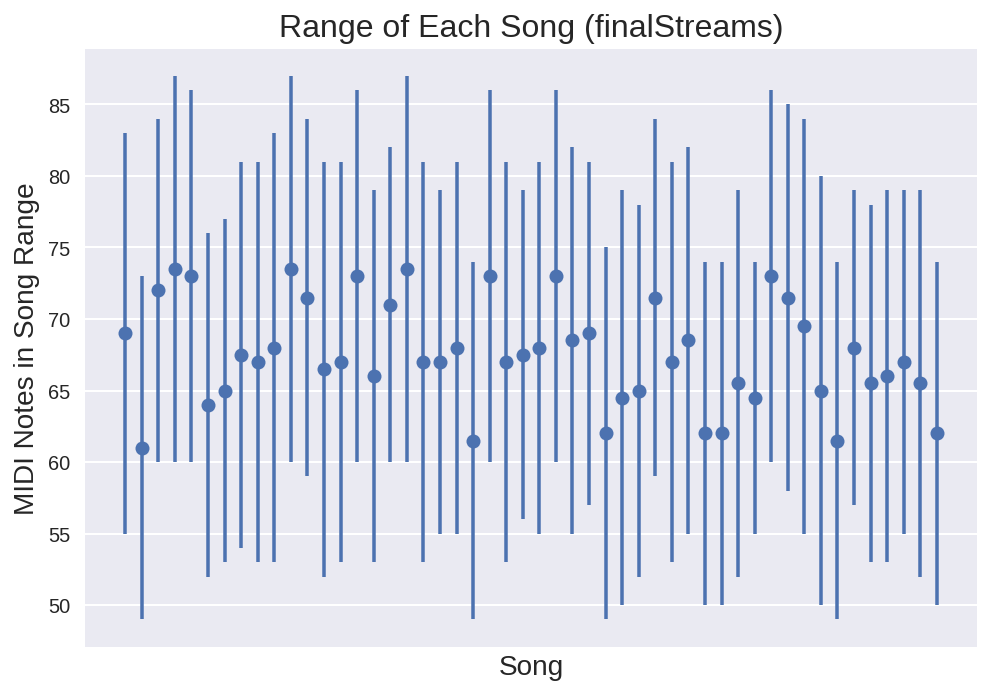

In [28]:
# Plot this new dataset version
y, e = getAveragesError(finalStreams)
plt.errorbar(range(len(y)), y, yerr = e, fmt = "o")

plt.title("Range of Each Song (finalStreams)", fontsize = 16)
plt.xlabel("Song", fontsize = 14)
plt.xticks([])
plt.ylabel("MIDI Notes in Song Range", fontsize = 14)

plt.show()

In [29]:
print("Mean:", np.mean(y), "Std Dev:", np.std(y))
findRange(finalStreams)

Mean: 67.57 Std Dev: 3.618024322748535
Min MIDI note: 49, C#3
Max MIDI note: 87, E-6


We now have the melodies still in C while all in or above an alto saxophone's range.  
We can subtract 49 from all MIDI notes in the melody to get final note indices of 0 to 38. We thus have 39 total possible notes.

## Extracting Melodies

In [0]:
def processNotes(stream, duration):
  """
  Create the 2D numpy array which will represent the notes of this song.
  NOTE: Vertical of the 2D array represents time.
        Horizontal represents the 12 possible notes for each tick.
  """
  subdivide = 12   # We again set the number of subdivisions our data and thus model will consider per beat. Same as we did with chords.
  possible_notes = 39 # Calculated above.
  
  ticks = int(duration * subdivide)  # The total number of "ticks" in this entire song. Exact same number as for the chords.
  
  # Create the numpy array to store the notes data.
  arr = np.zeros((ticks, possible_notes))
  
  part = stream.parts[0]
  
  # Collect the notes in the song.
  for m in part:                                     # For measures in the song...
    if isinstance(m, m21.stream.Measure):
      # By reseting the offset each measure, we also insure that any errors don't cascade across the entire song.
      measureOffset = m.offset                       # This offset is in ticks.
      
      for n in m.notes:
        if isinstance(n, m21.note.Note):             # If this object is a note...
          noteOffset = round((n.offset + measureOffset) * subdivide) # Its offset is the measure's plus the note's within the measure.
          
          ticksInNote = int(round(n.duration.quarterLength * subdivide)) # Round in the off case of 32nd notes or something.
          endOfNote = noteOffset + ticksInNote
          
          pitch = n.pitch
          num = int(pitch.midi) - 49                 # Get the note's MIDI number and adjust it down into 0-38.
          
          for r in range(noteOffset, endOfNote):     # For each row, representing all ticks in this note...
            arr[r][num] = 1                          # Set this note's adjusted MIDI number on.
          
  return arr

In [31]:
notes = []

i = 1
for s in finalStreams:
  if (i == 1 or i % 5 == 0):
    print("Processing song", i)
  d = getDuration(s)
  arr = processNotes(s, d)
  notes.append(arr)
  i = i + 1

Processing song 1
Processing song 5
Processing song 10
Processing song 15
Processing song 20
Processing song 25
Processing song 30
Processing song 35
Processing song 40
Processing song 45
Processing song 50


In [0]:
# Verify that the outputs are the same lengths.
for i in range(50):
  if (len(chords[i]) != len(notes[i])):
    print("Oopsie!")

In [33]:
total = 0
for arr in chords:
  total = total + arr.size
for arr in notes:
  total = total + arr.size
  
print("We have", total, "total datapoints.")

We have 8619408 total datapoints.


# Export to .csv